In [5]:
import numpy as np
import pandas
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from spsspro.algorithm import supervised_learning
import alepython
from alepython import ale_plot
import PyALE
from PyALE import ale
import random

In [6]:
#生成案例数据
data = pandas.read_csv("生育意愿数据20250301.CSV")
data_y = data.iloc[:, 0]
data_x = data.iloc[:, 1:]
#xgboost分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_regression(data_x=data_x, data_y=data_y)

You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[[-0.18284482 -0.01680325 -0.00187099 ... -0.01652091 -0.02546399
  -0.0381031 ]
 [-0.02978209  0.00870897  0.00287323 ... -0.0199302  -0.02558804
   0.02457286]
 [-0.04185504  0.00995298 -0.00415401 ... -0.03462368 -0.02076467
   0.0081261 ]
 ...
 [ 0.01708647  0.0172565  -0.00039007 ...  0.05464743  0.01699696
   0.05526076]
 [-0.05072036  0.01125892 -0.005964   ... -0.0611208  -0.04578924
  -0.06514483]
 [ 0.01263468  0.00391492 -0.00134196 ...  0.04143907  0.00690509
   0.02276402]]
.values =
array([[-0.18284482, -0.01680325, -0.00187099, ..., -0.01652091,
        -0.02546399, -0.0381031 ],
       [-0.02978209,  0.00870897,  0.00287323, ..., -0.0199302 ,
        -0.02558804,  0.02457286],
       [-0.04185504,  0.00995298, -0.00415401, ..., -0.03462368,
        -0.02076467,  0.0081261 ],
       ...,
       [ 0.01708647,  0.0172565 , -0.00039007, ...,  0.05464743,
         0.01699696,  0.05526076],
       [-0.05072036,  0.01125892, -0.005964  , ..., -0.0611208 ,
        -0.04578924, 

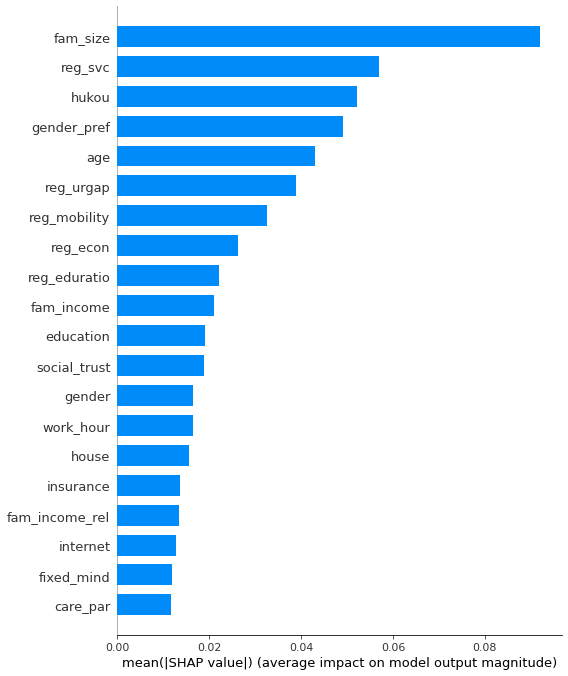

           feature  importance
0              age    0.043086
1           gender    0.016542
2            urban    0.003783
3            party    0.003658
4         fam_size    0.092105
5            hukou    0.052224
6            ethno    0.006312
7        education    0.019001
8          age_gap    0.011259
9          edu_gap    0.010681
10     gender_pref    0.049144
11     mar_satisfy    0.007428
12            work    0.003945
13       work_hour    0.016458
14       insurance    0.013720
15   care_from_par    0.003053
16    fin_from_par    0.003476
17         fin_par    0.004611
18        care_par    0.011666
19        internet    0.012823
20    social_trust    0.018785
21   social_status    0.005796
22      fixed_mind    0.011824
23     growth_mind    0.008583
24        religion    0.003019
25     gover_evalu    0.005611
26   reg_eldercare    0.010927
27   reg_childcare    0.008948
28          health    0.011661
29    reg_medicare    0.006374
30           house    0.015612
31      

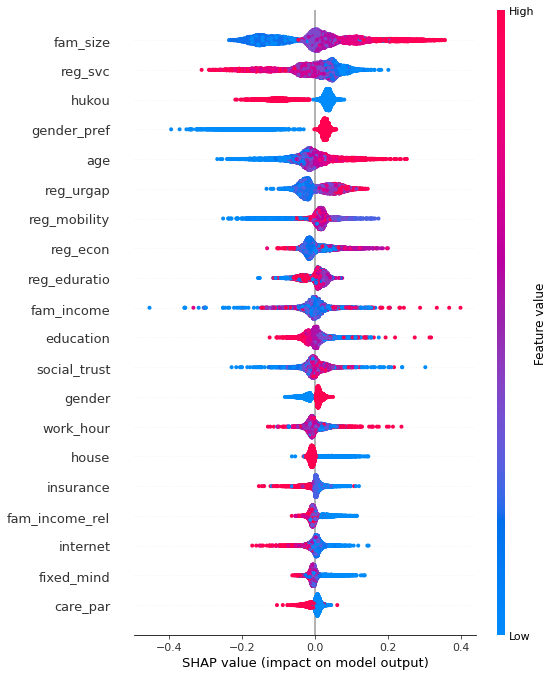

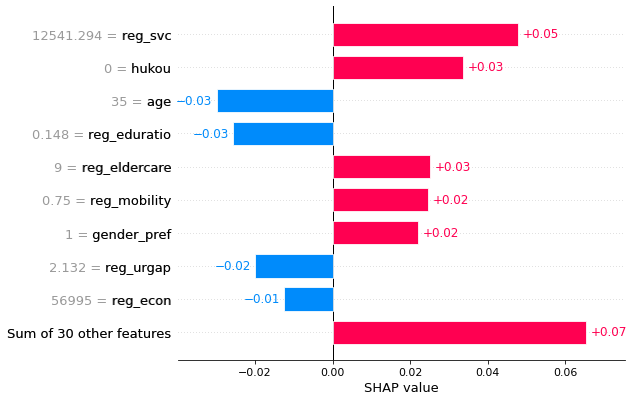

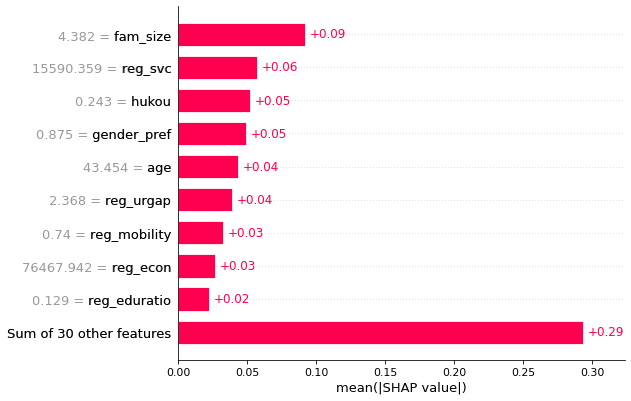

In [7]:
# SHAP分析
explainer = shap.TreeExplainer(result['model'])
shap_values = explainer.shap_values(data_x)
shap_values2 = explainer(data_x)
print(shap_values)
print(shap_values2)
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="bar")
plt.show()
#数值展示
feature_importance = pandas.DataFrame()

feature_importance['feature'] = data_x.columns

feature_importance['importance'] = np.abs(shap_values).mean(0)

feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

# 可视化
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="dot")
#plt.savefig('shap_all.png',dpi=600)
#局部以及全局图
shap.plots.bar(shap_values2[1], show_data=True)
shap.plots.bar(shap_values2, show_data=True)

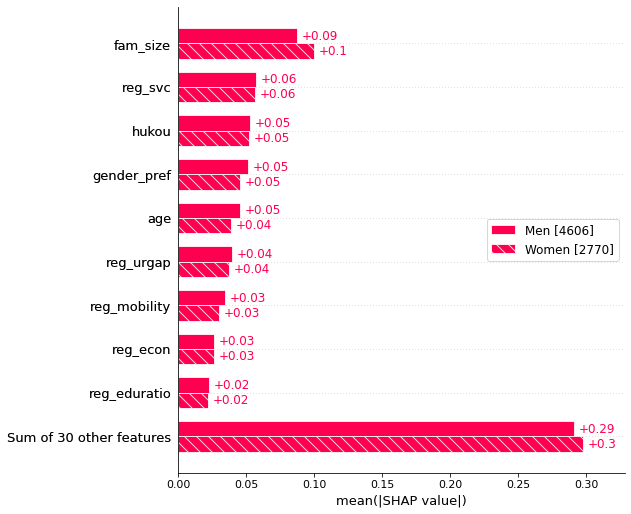

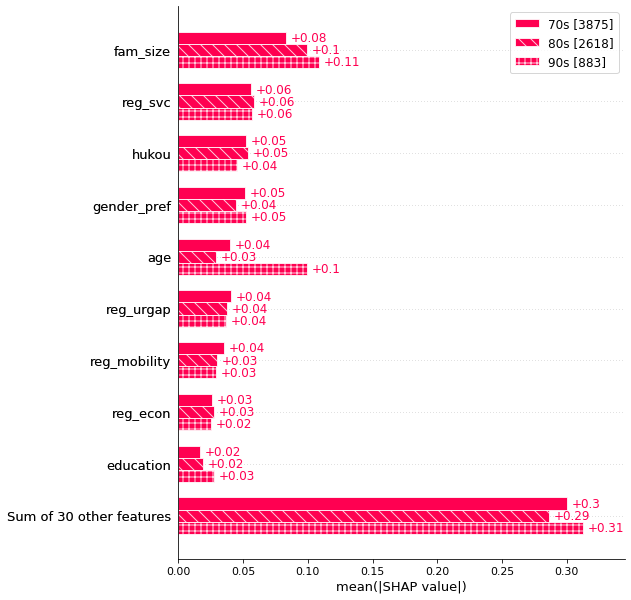

In [8]:
#队列条形图
sex = ["Women" if shap_values2[i,"gender"].data == 0 
       else "Men" for i in range(shap_values2.shape[0])]
shap.plots.bar(shap_values2.cohorts(sex).abs.mean(0))
# 假设 shap_values2 是 Explanation 对象，且 "age" 是特征列
year = ["90s" if shap_values2[i,"age"].data <= 32 
        else "70s" if shap_values2[i,"age"].data >= 43
       else "80s" for i in range(shap_values2.shape[0])]
shap.plots.bar(shap_values2.cohorts(year).abs.mean(0))

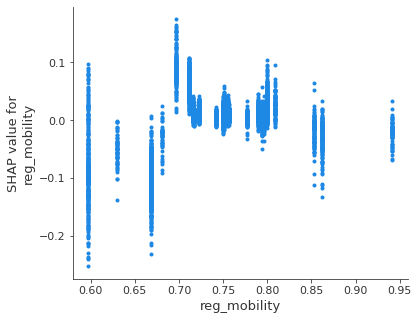

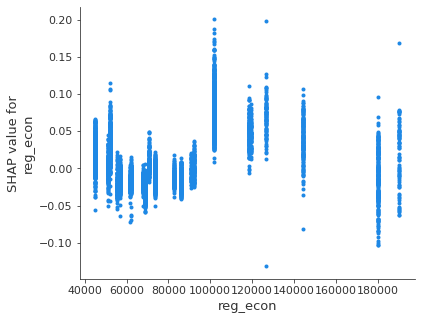

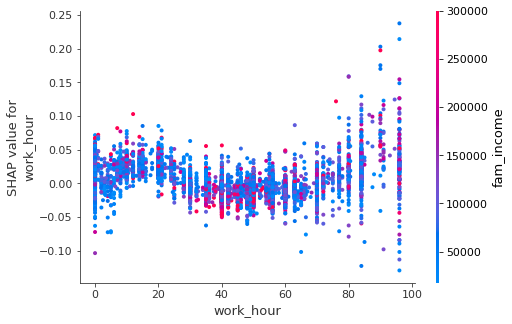

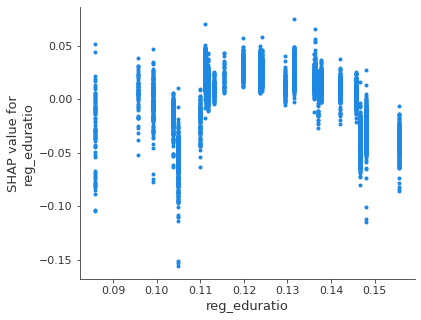

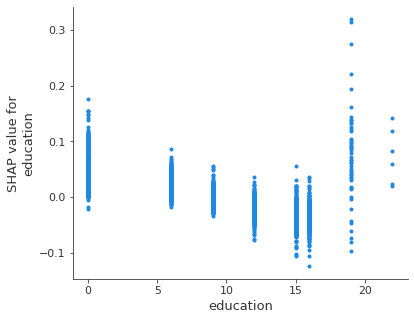

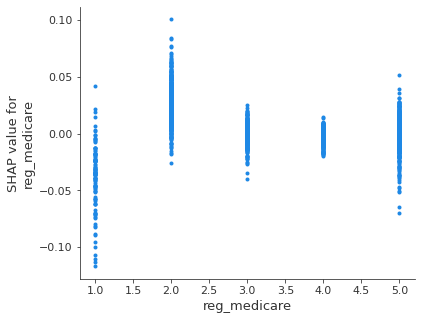

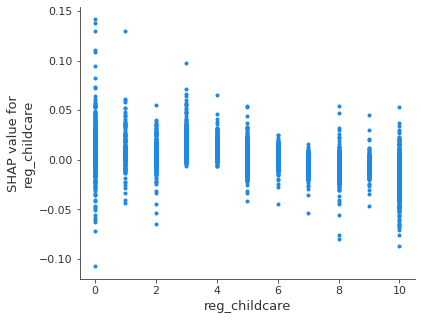

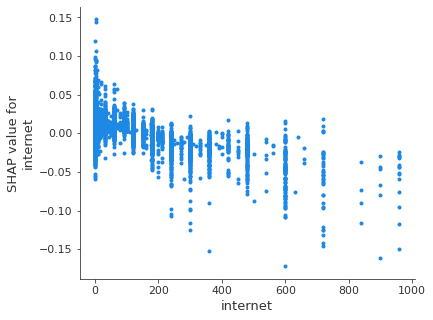

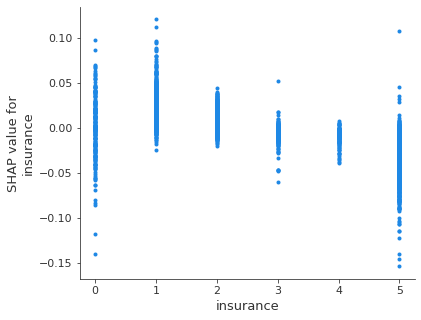

In [9]:
#依赖图
shap.dependence_plot('reg_mobility', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_econ', shap_values, data_x, interaction_index=None)
shap.dependence_plot('work_hour', shap_values, data_x, interaction_index='fam_income')
shap.dependence_plot('reg_eduratio', shap_values, data_x, interaction_index=None)
shap.dependence_plot('education', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_medicare', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_childcare', shap_values, data_x, interaction_index=None)
shap.dependence_plot('internet', shap_values, data_x, interaction_index=None)
shap.dependence_plot('insurance', shap_values, data_x, interaction_index=None)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


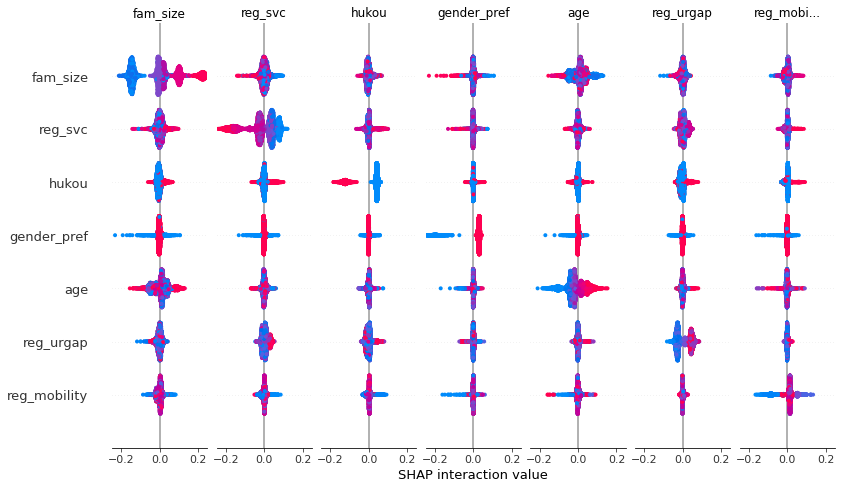

{'model_features': {'name': ['age', 'gender', 'urban', 'party', 'fam_size', 'hukou', 'ethno', 'education', 'age_gap', 'edu_gap', 'gender_pref', 'mar_satisfy', 'work', 'work_hour', 'insurance', 'care_from_par', 'fin_from_par', 'fin_par', 'care_par', 'internet', 'social_trust', 'social_status', 'fixed_mind', 'growth_mind', 'religion', 'gover_evalu', 'reg_eldercare', 'reg_childcare', 'health', 'reg_medicare', 'house', 'fam_income', 'fam_income_rel', 'area', 'reg_econ', 'reg_svc', 'reg_urgap', 'reg_eduratio', 'reg_mobility'], 'data': [0.017000000923871994, 0.014999999664723873, 0.010999999940395355, 0.013000000268220901, 0.05400000140070915, 0.1289999932050705, 0.032999999821186066, 0.020999999716877937, 0.014999999664723873, 0.017999999225139618, 0.061000000685453415, 0.014999999664723873, 0.017000000923871994, 0.017999999225139618, 0.02500000037252903, 0.01600000075995922, 0.014000000432133675, 0.012000000104308128, 0.017000000923871994, 0.01600000075995922, 0.017999999225139618, 0.01600

In [10]:
#交互图
shap_interaction_values = explainer.shap_interaction_values(data_x)
shap.summary_plot(shap_interaction_values, data_x)
print(result)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

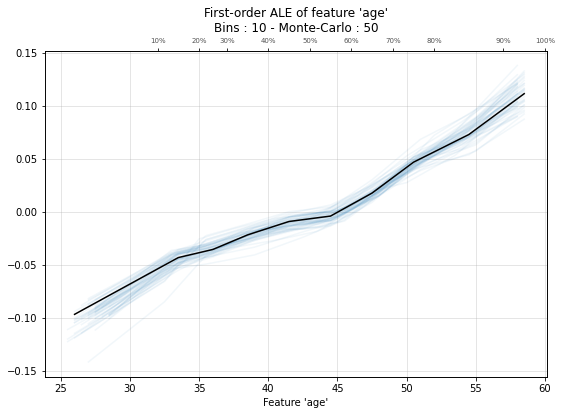

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

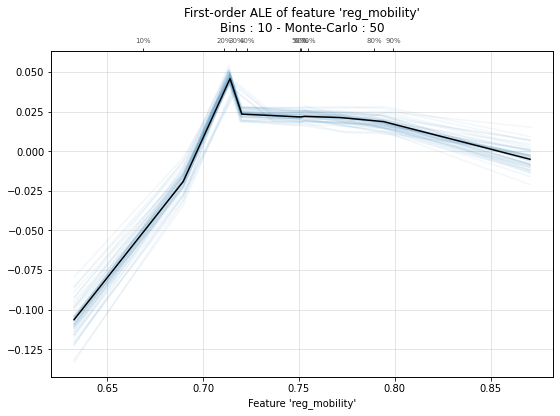

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


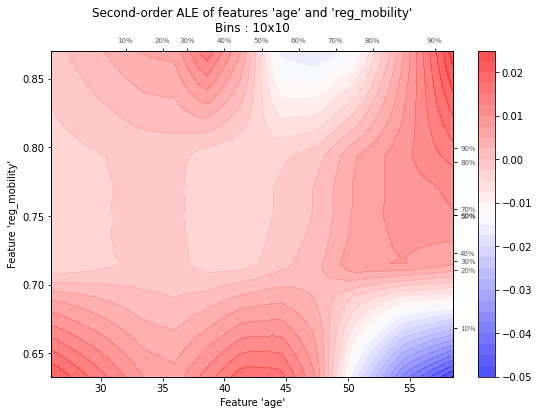

<AxesSubplot:title={'center':"Second-order ALE of features 'age' and 'reg_mobility'\nBins : 10x10"}, xlabel="Feature 'age'", ylabel="Feature 'reg_mobility'">

In [11]:
#ale图
plt.rc("figure", figsize=(9,6))
ale_plot(result['model'], data_x, 'age', monte_carlo=True)
ale_plot(result['model'], data_x, 'reg_mobility', monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["age","reg_mobility"], bins=10, monte_carlo=True)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

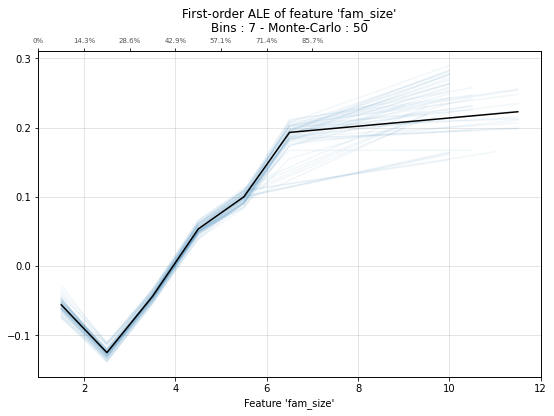

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

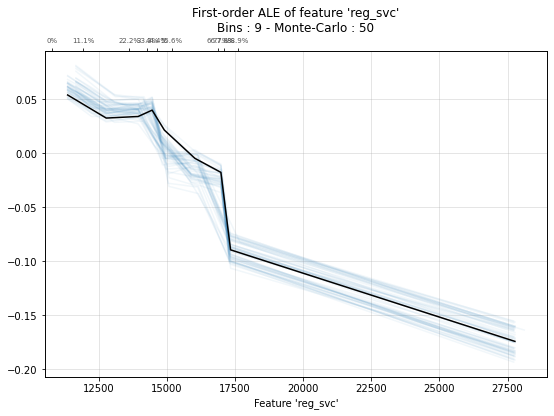

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

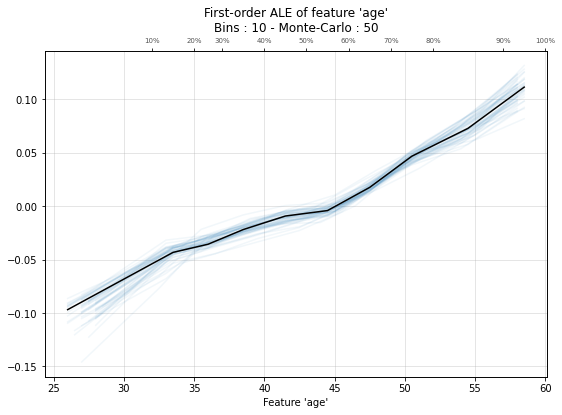

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

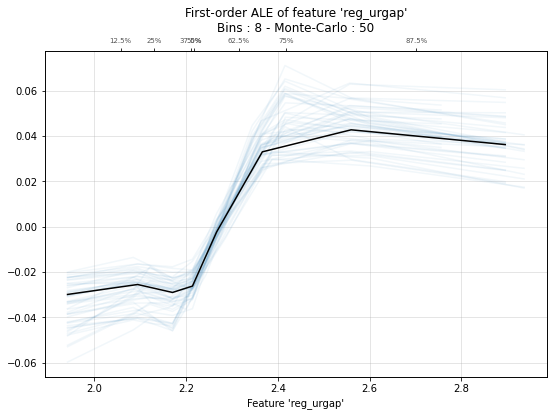

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

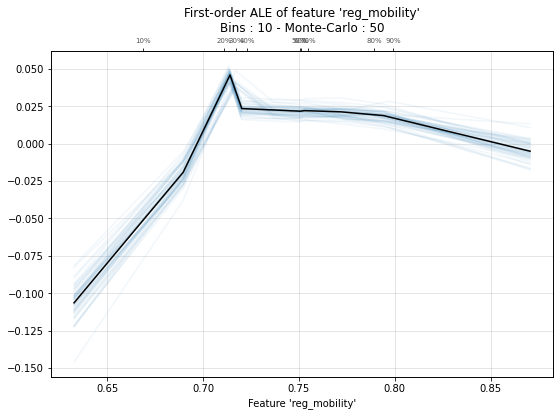

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

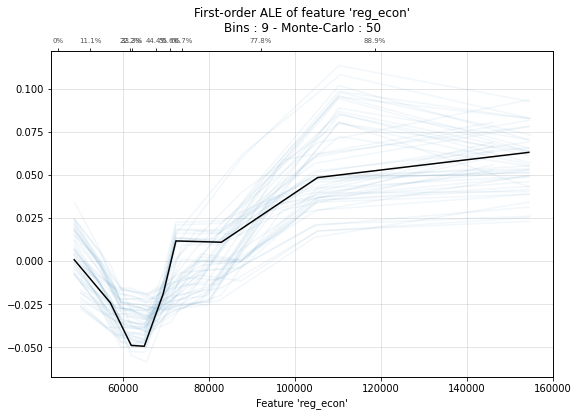

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

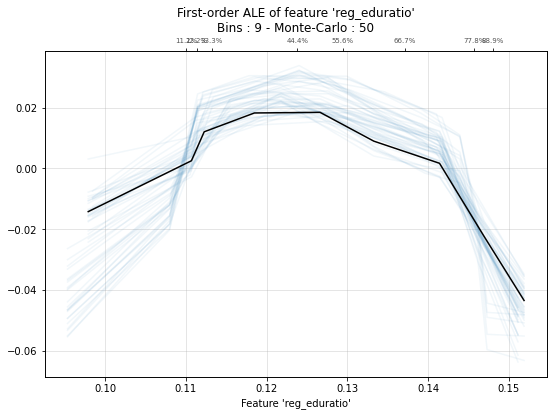

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

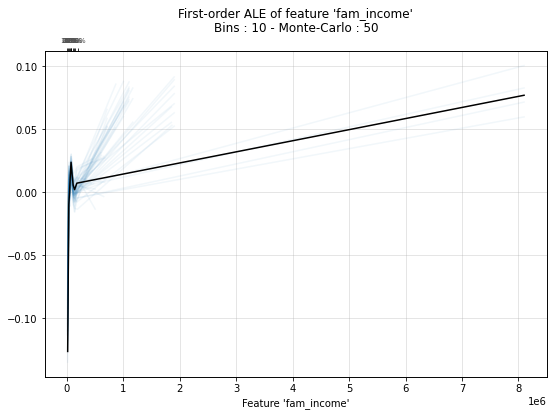

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

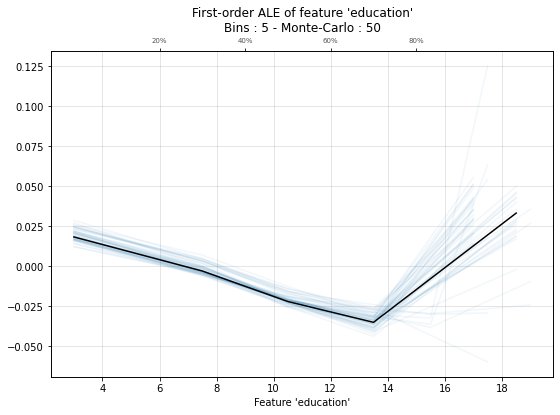

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

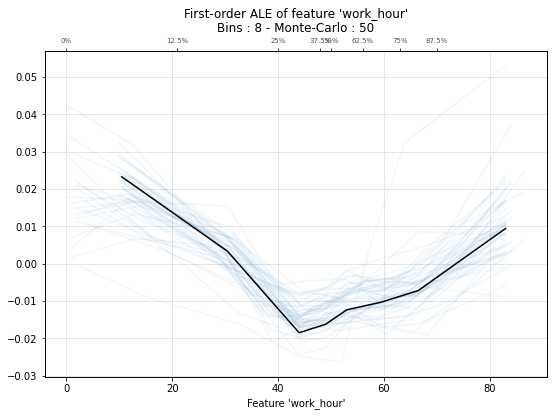

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

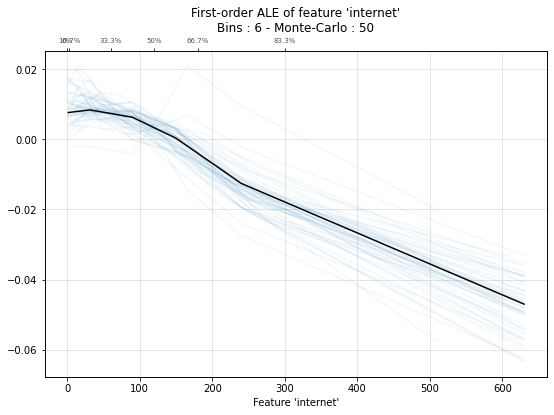

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

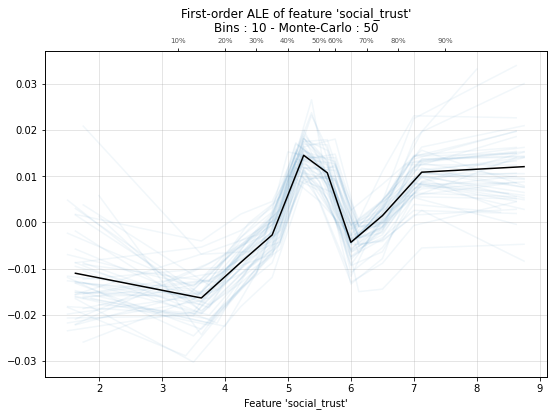

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

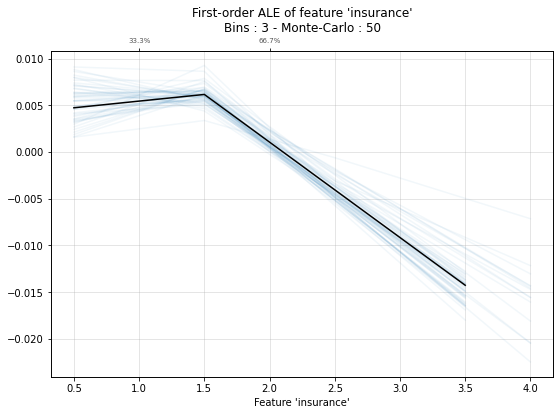

<AxesSubplot:title={'center':"First-order ALE of feature 'insurance'\nBins : 3 - Monte-Carlo : 50"}, xlabel="Feature 'insurance'">

In [12]:
#一维线性
ale_plot(model=result['model'], train_set=data_x, features=["fam_size"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_svc"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["age"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_urgap"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_mobility"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_econ"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_eduratio"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["fam_income"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["education"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["work_hour"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["internet"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["social_trust"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["insurance"], bins=10, monte_carlo=True)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


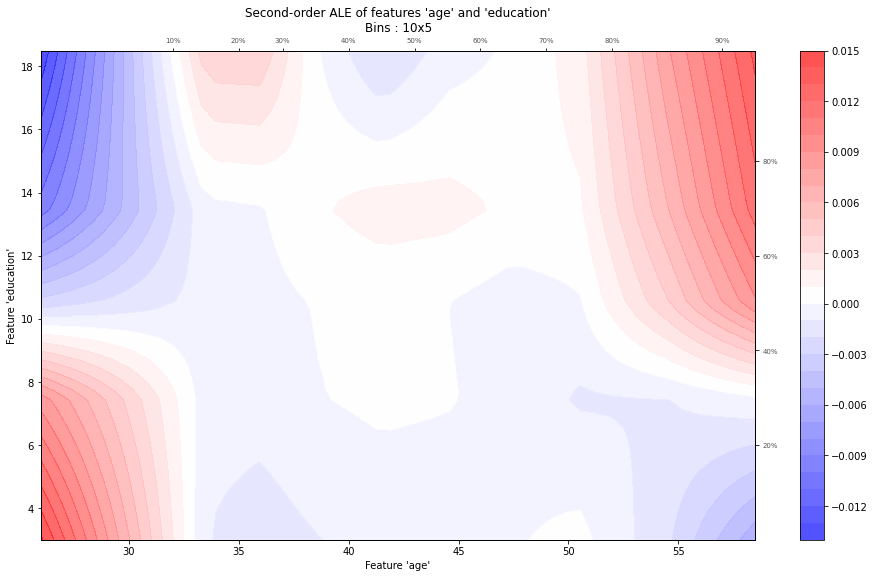

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


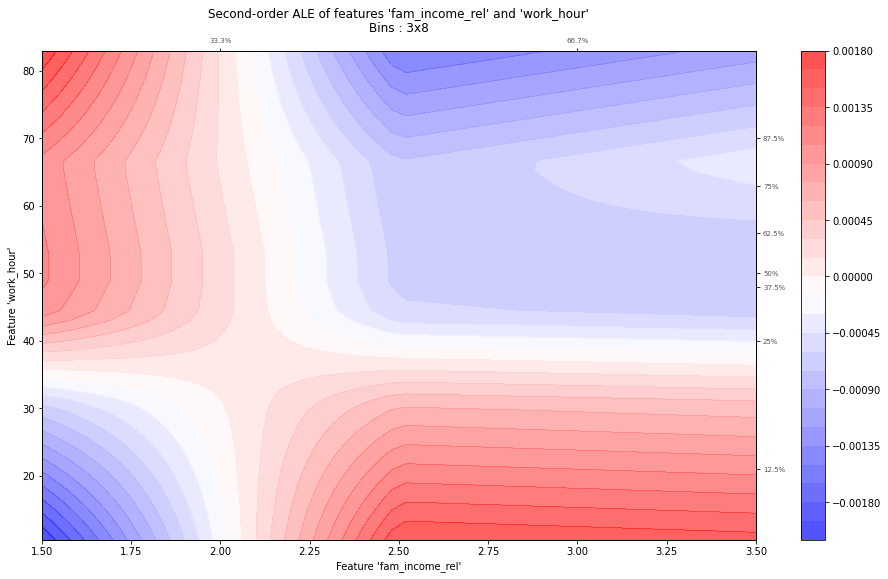

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


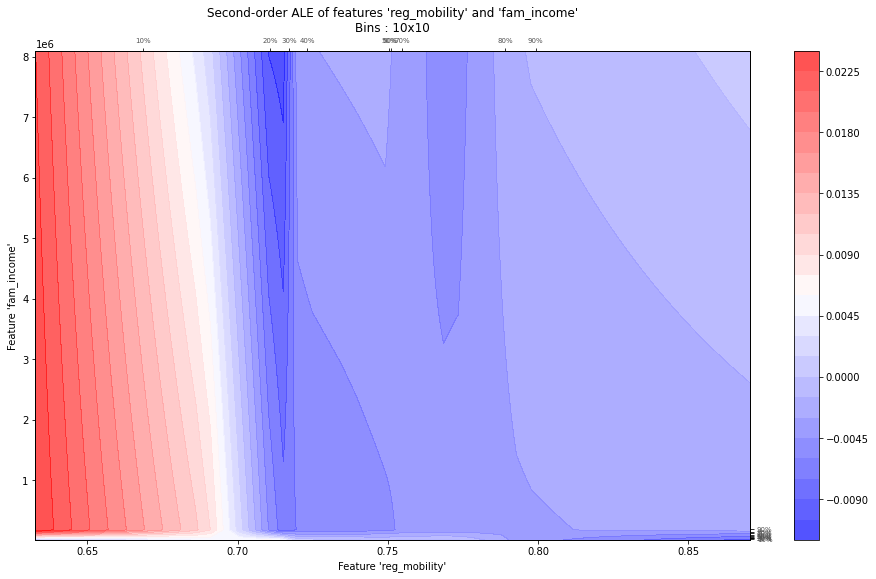

<AxesSubplot:title={'center':"Second-order ALE of features 'reg_mobility' and 'fam_income'\nBins : 10x10"}, xlabel="Feature 'reg_mobility'", ylabel="Feature 'fam_income'">

In [13]:
#交叉图
plt.rc("figure", figsize=(16,9))
ale_plot(model=result['model'], train_set=data_x, features=["age","education"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["fam_income_rel","work_hour"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_mobility","fam_income"], bins=10, monte_carlo=True)

PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
PyALE._ALE_generic:INFO: Continuous feat

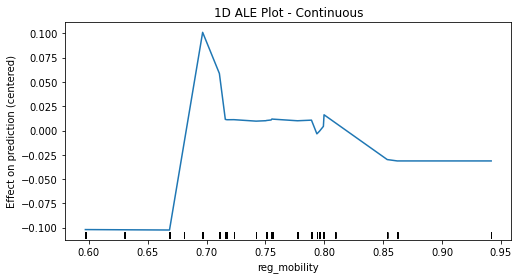

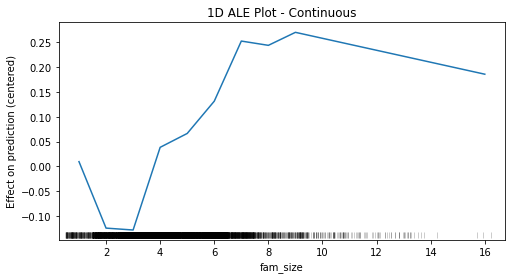

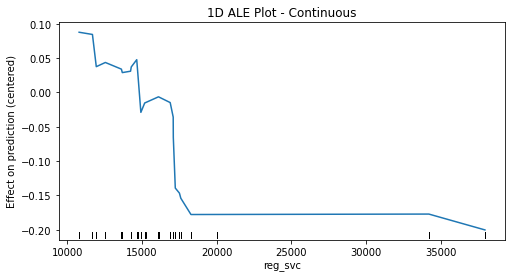

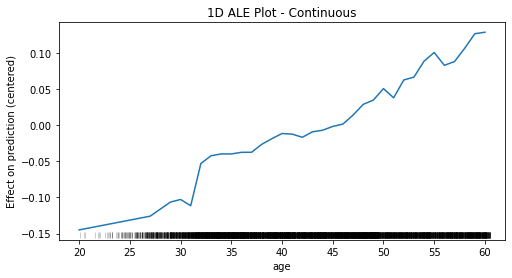

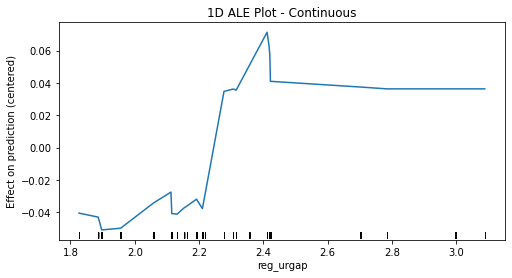

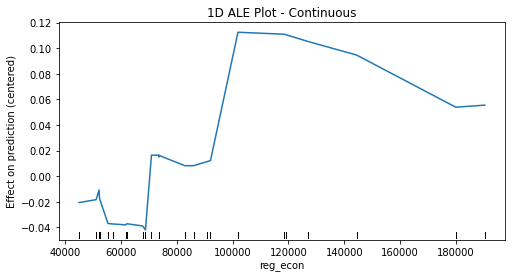

In [14]:
#ale图
## 1D - continuous - no CI
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_mobility"], grid_size=50, include_CI=False
)
#plt.savefig('reg_mobility.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["fam_size"], grid_size=50, include_CI=False
)
#plt.savefig('fam_size.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_svc"], grid_size=50, include_CI=False
)
#plt.savefig('reg_svc',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["age"], grid_size=50, include_CI=False
)
#plt.savefig('age.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_urgap"], grid_size=50, include_CI=False
)
#plt.savefig('reg_urgap.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_econ"], grid_size=50, include_CI=False
)
#plt.savefig('reg_econ.png',dpi=600)

PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
PyALE._ALE_generic:INFO: Continuous feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


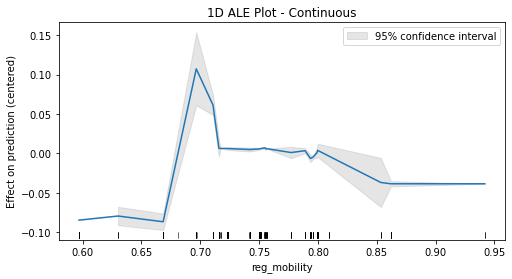

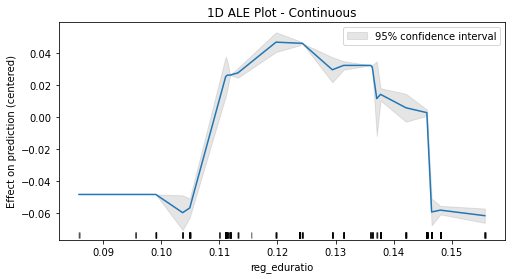

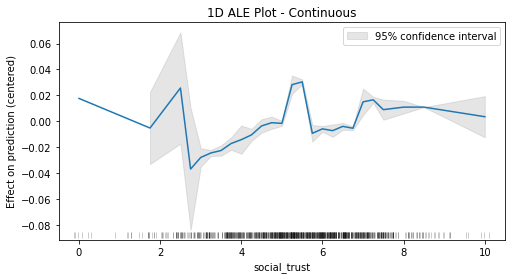

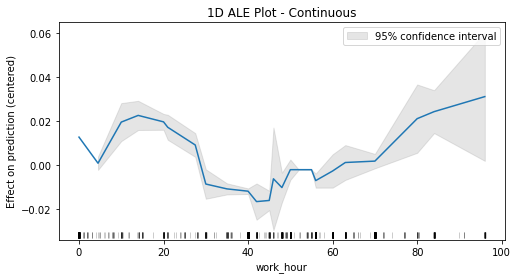

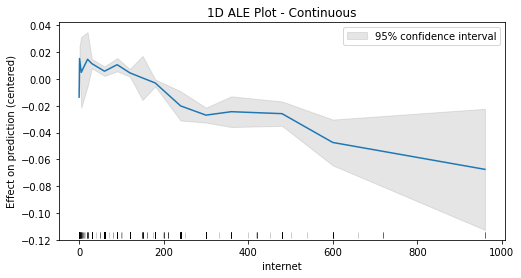

In [15]:
## 1D - continuous - with 95% CI
random.seed(123)
X_sample = data_x.loc[random.sample(data_x.index.to_list(), 1000), :]
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["reg_mobility"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["reg_eduratio"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["social_trust"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["work_hour"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["internet"], grid_size=50, include_CI=True, C=0.95
)

PyALE._ALE_generic:INFO: Discrete feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
invalid value encountered in reduce
invalid value encountered in reduce
PyALE._ALE_generic:INFO: Discrete feature detected.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
invalid value encountered in reduce
invalid value encountered in reduce


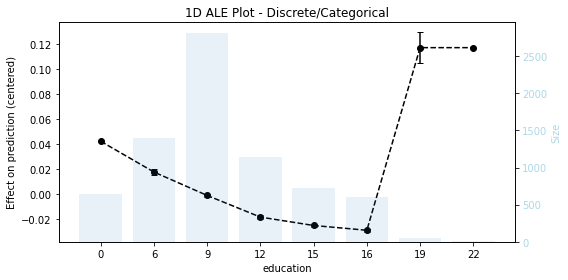

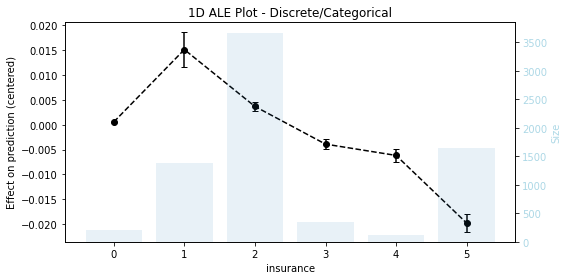

In [16]:
#ale图
#离散ale1D
## 1D - discrete
ale_eff = ale(X=data_x, model=result['model'], feature=["education"])
ale_eff = ale(X=data_x, model=result["model"], feature=["insurance"])

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


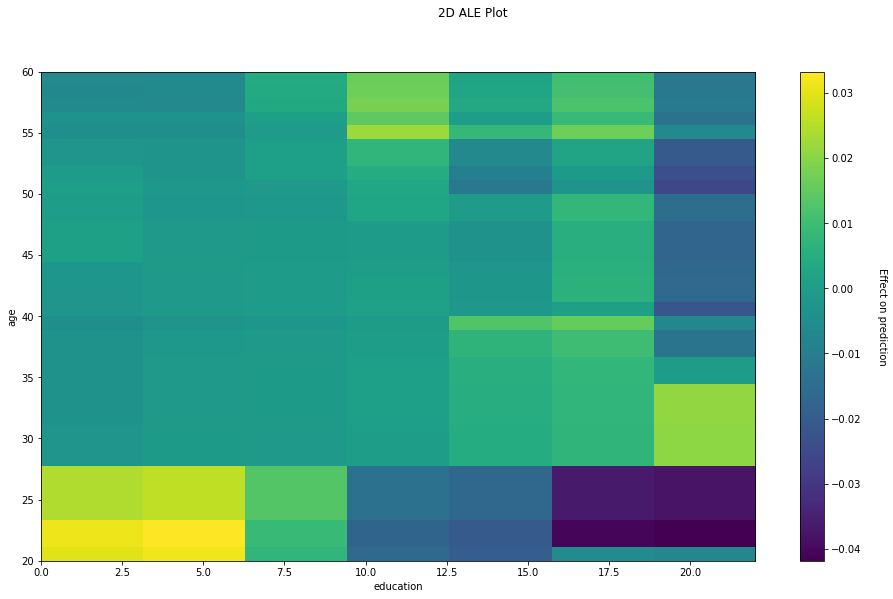

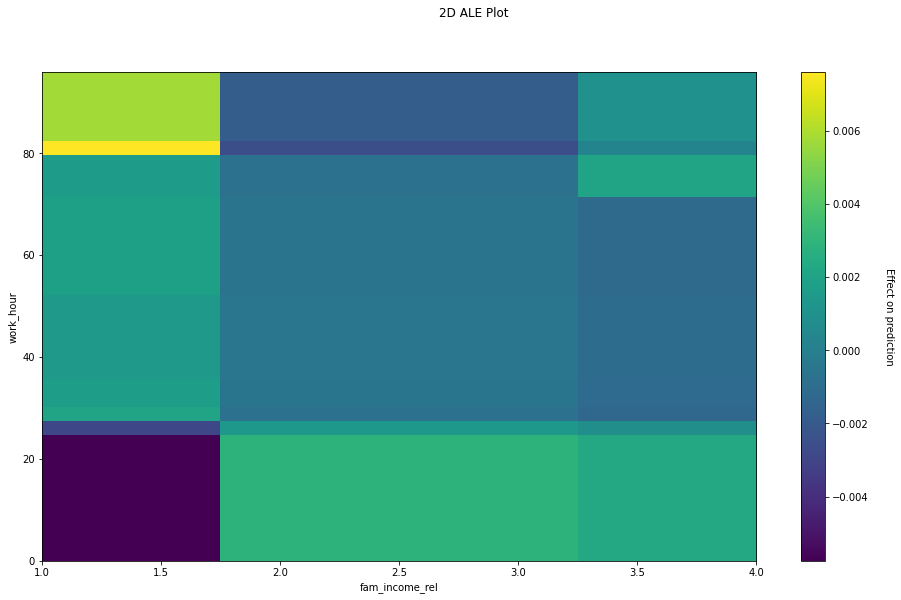

In [17]:
#2Dale图
ale_eff = ale(X=data_x,model=result['model'], feature=["age","education"], grid_size=100)
ale_eff = ale(X=data_x,model=result['model'], feature=["work_hour","fam_income_rel"], grid_size=100)